In [1]:
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display
import seaborn as snsk
import matplotlib.pyplot as plt
%matplotlib inline

# Load the wholesale customers dataset
data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

Wholesale customers dataset has 440 samples with 6 features each.


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
indices = [43, 12, 39]

samples = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,630,11095,23998,787,9529,72
1,31714,12319,11757,287,3881,2931
2,56159,555,902,10002,212,2916


In [5]:
# Get the means 
mean_data = data.describe().loc['mean', :]
mean_data

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

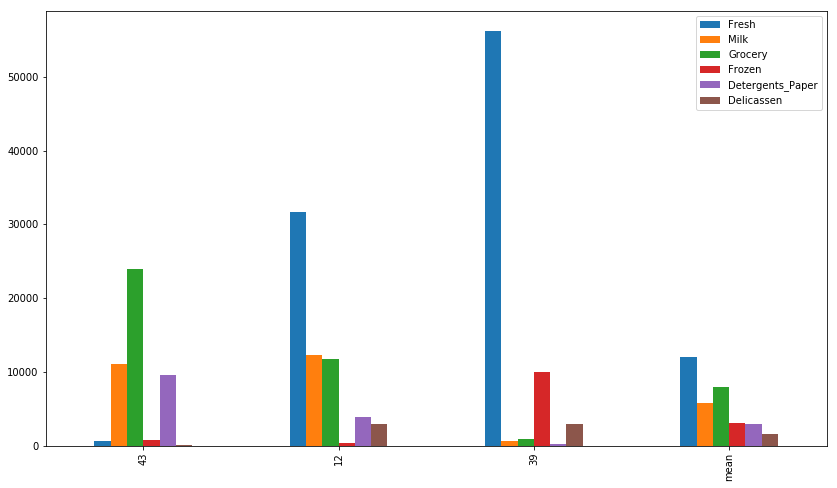

In [6]:
# Append means to the samples' data
samples_bar = samples.append(mean_data)
# Construct indices
samples_bar.index = indices + ['mean']
samples_bar

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,8))

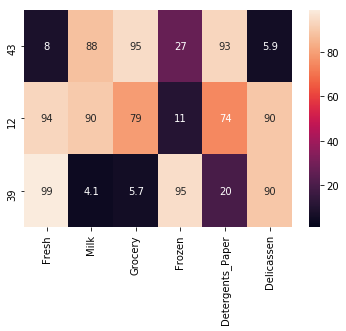

In [7]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

In [8]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [9]:
dep_vars = list(data.columns)

for dv in dep_vars:
    X = data.drop(dv,axis=1)
    y = data[dv]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    dtr = DecisionTreeRegressor(random_state=42)
    dtr.fit(X_train, y_train)
    score = dtr.score(X_test, y_test)
    
    print(('R2 score for {} as dependent variable: {}'.format(dv, score)))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


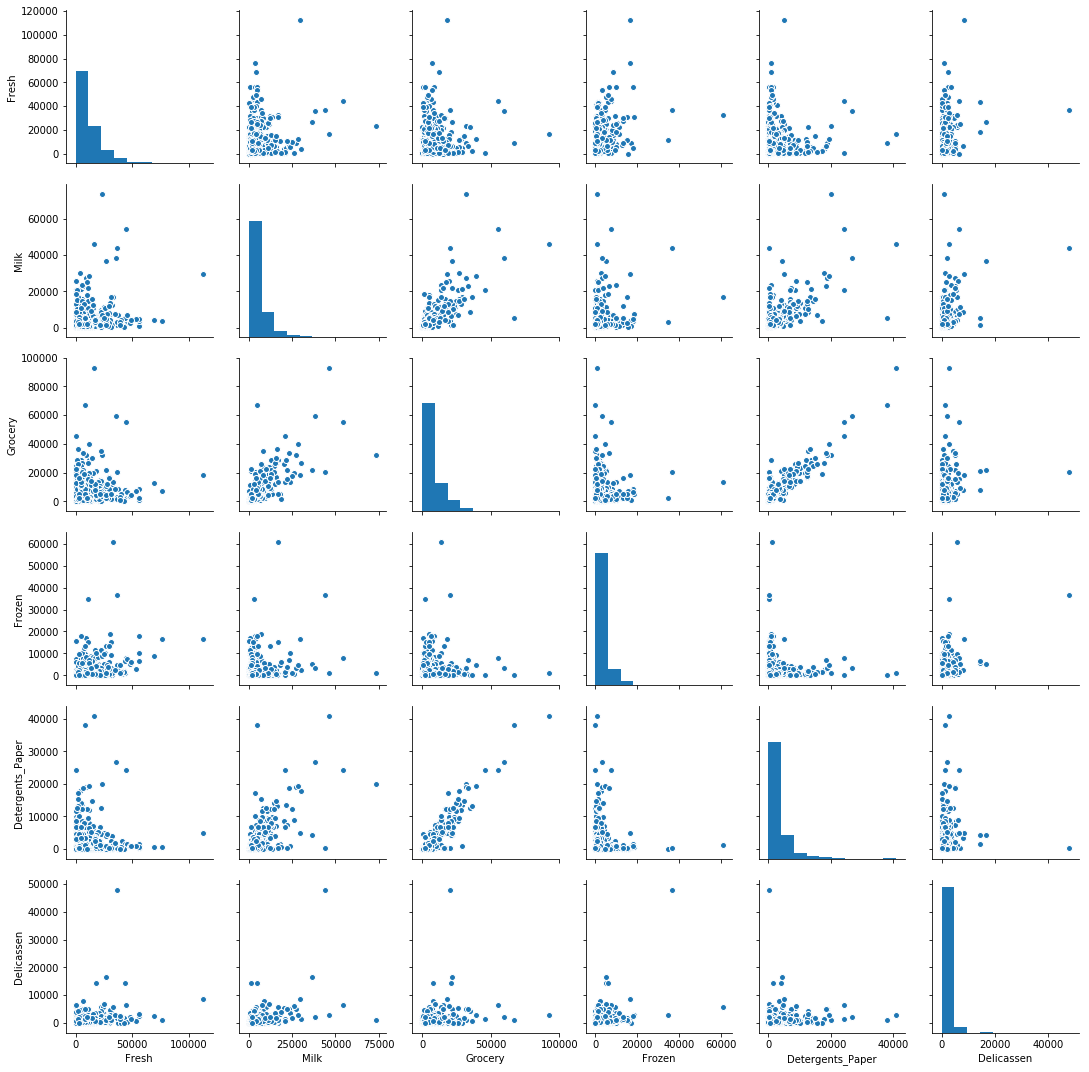

In [10]:
sns.pairplot(data)

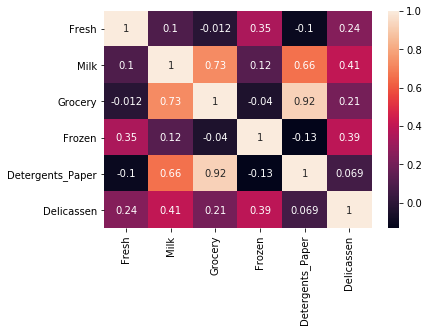

In [11]:
sns.heatmap(data.corr(),annot=data.corr())
plt.show()

In [12]:
log_data = np.log(data)
log_samples = np.log(samples)

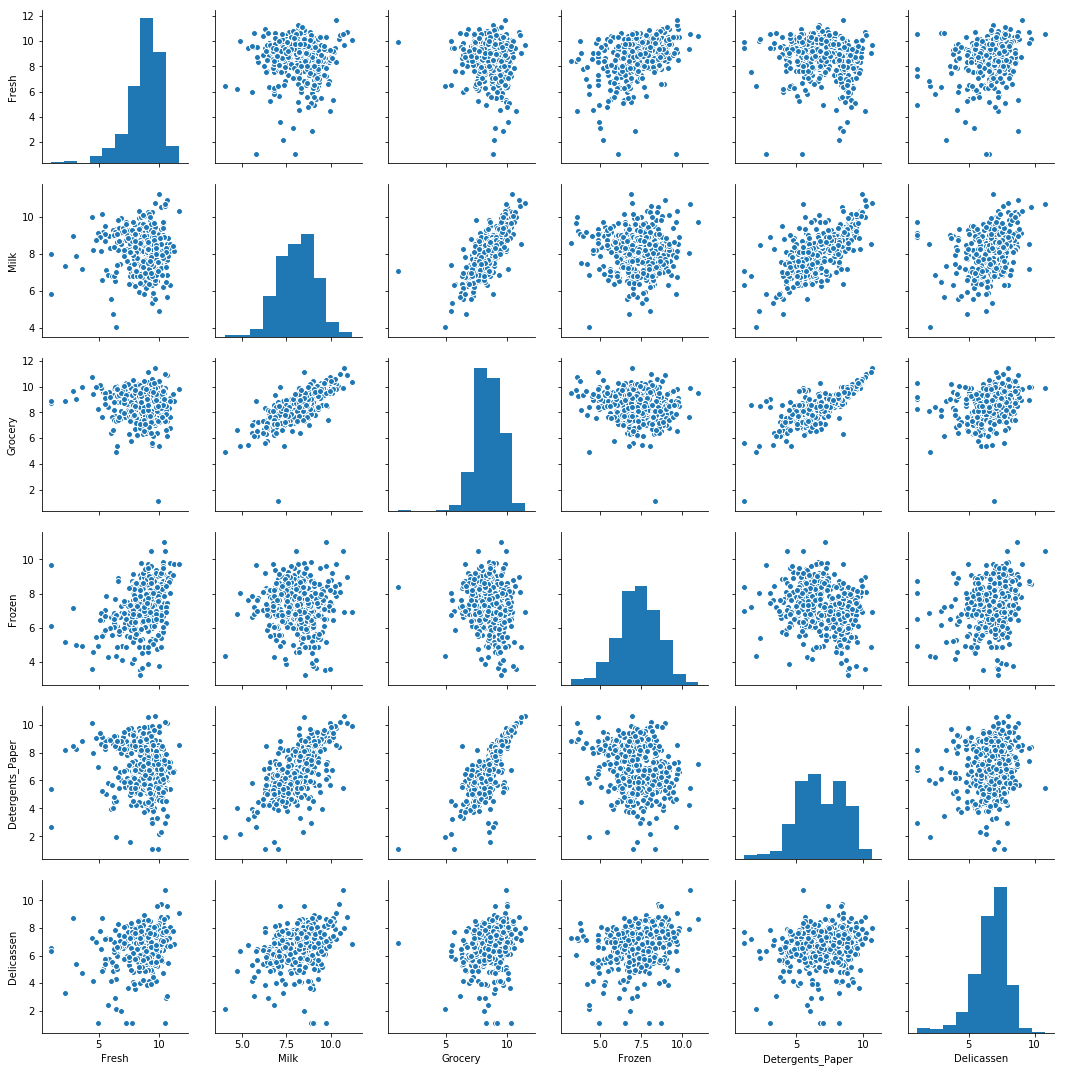

In [13]:
sns.pairplot(log_data)
plt.show()

In [14]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6.445720,9.314250,10.085726,6.668228,9.162095,4.276666
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968


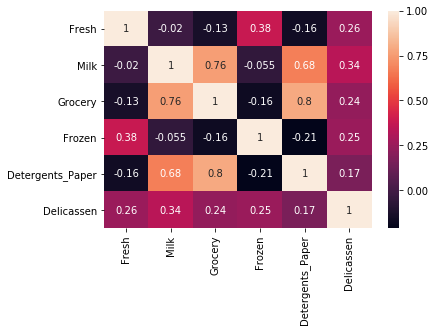

In [15]:
sns.heatmap(log_data.corr(),annot=log_data.corr())
plt.show()

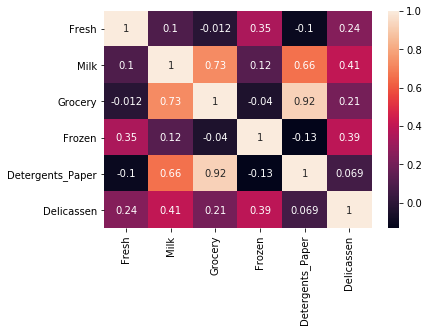

In [16]:
sns.heatmap(data.corr(),annot=data.corr())
plt.show()

In [17]:
import itertools

In [18]:
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print('Original shape of data:\n', data.shape)
# Processed Data
print('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicassen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


In [19]:
from sklearn.decomposition import PCA

In [20]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=6)
# Fit
pca.fit(good_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

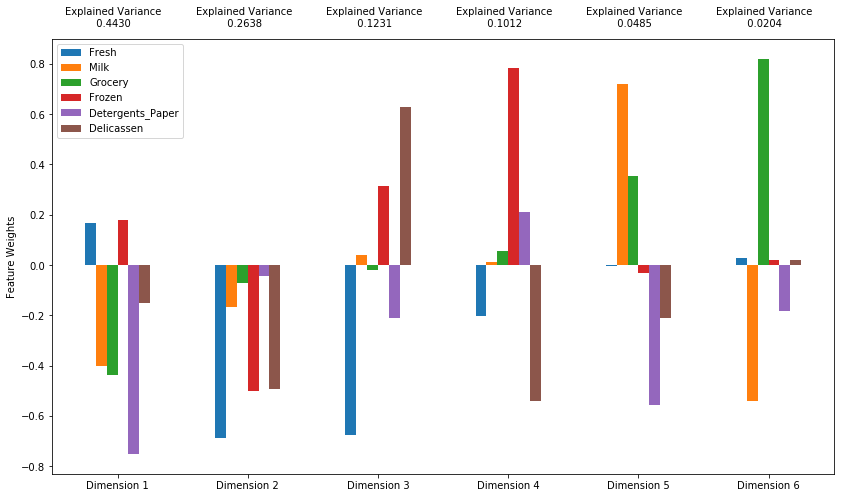

In [22]:
# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [23]:
display(pca_results)
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

In [24]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.1072,2.7017,-0.6386,1.8708,0.6452,0.1333
1,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782
2,3.0426,-2.5854,0.1965,-0.0757,-1.4213,0.0093


In [25]:
# TODO: Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [26]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.1072,2.7017
1,-2.2406,-1.2419
2,3.0426,-2.5854


In [27]:
# Imports
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [29]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.3761556577675909
For n_clusters = 3. The average silhouette_score is : 0.36638738533011384
For n_clusters = 4. The average silhouette_score is : 0.32323080124683745
For n_clusters = 5. The average silhouette_score is : 0.28448139507638087
For n_clusters = 6. The average silhouette_score is : 0.23135491854984927
For n_clusters = 7. The average silhouette_score is : 0.31268370904861814
For n_clusters = 8. The average silhouette_score is : 0.2917191641636062
For n_clusters = 9. The average silhouette_score is : 0.28638347760185767
For n_clusters = 10. The average silhouette_score is : 0.28448530778190917


In [30]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [31]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.42628101546910846
For n_clusters = 3. The average silhouette_score is : 0.3964173871966855
For n_clusters = 4. The average silhouette_score is : 0.3312906998135325
For n_clusters = 5. The average silhouette_score is : 0.34999779752629756
For n_clusters = 6. The average silhouette_score is : 0.3604818029075364
For n_clusters = 7. The average silhouette_score is : 0.36464788427816824
For n_clusters = 8. The average silhouette_score is : 0.3656471969172149
For n_clusters = 9. The average silhouette_score is : 0.352352162504028
For n_clusters = 10. The average silhouette_score is : 0.34363037011157443


In [32]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = GaussianMixture(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

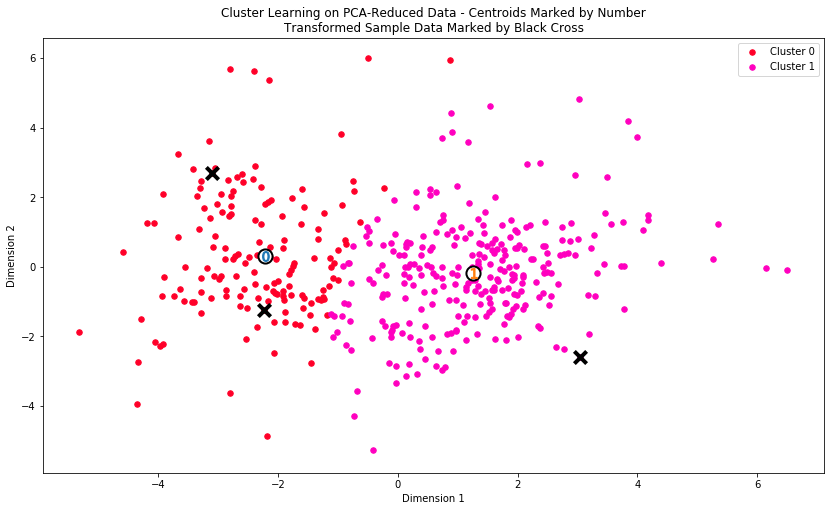

In [33]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [34]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


In [35]:
# Clusters' deviation from median
display(true_centers - data.median())

# Clusters' deviation from mean
# As you can see, this is not a meaningful comparison for Segment 1 where everything is negative
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-4952.0,4210.0,7463.5,-656.0,3879.5,-3.5
Segment 1,449.0,-1513.0,-1990.5,549.0,-463.5,-233.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-8448.297727,2040.734091,4267.722727,-2201.931818,1814.506818,-562.870455
Segment 1,-3047.297727,-3682.265909,-5186.277273,-996.931818,-2528.493182,-792.870455


In [36]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [44]:
dup_outliers

[128, 65, 66, 75, 154]

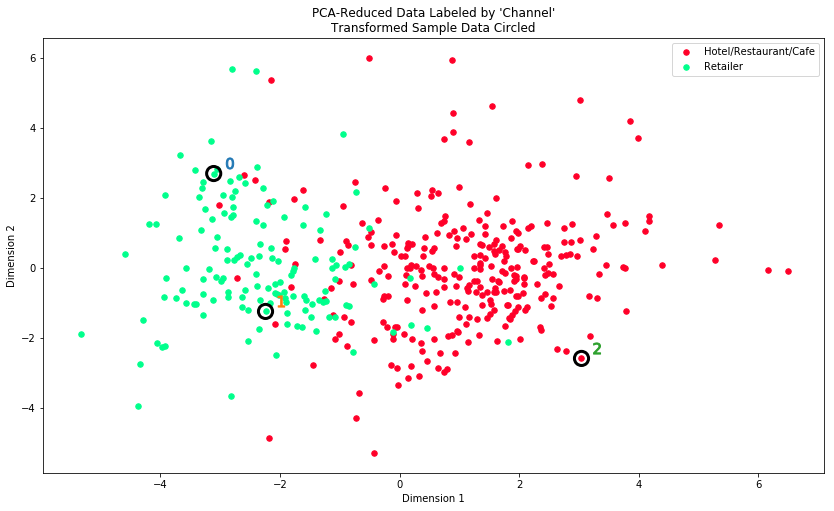

In [45]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, dup_outliers, pca_samples)